# *Importing the necessary libraries*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# *Importing the datasets*

In [ ]:
# If running in google collab, please import the datasets once the script is connected to runtime.
train = pd.read_csv('train_selected.csv')
test = pd.read_csv('test_selected.csv')

In [ ]:
x = train.iloc[:,1:-2]      # Feature set for the train_selected dataset
y = train.iloc[:,-1]        # Dependent set for the train_selected dataset
# train

In [ ]:
x_test_set = test.iloc[:,1:-2]   # Feature set for the test_selected dataset
y_test_set = test.iloc[:,-1]     # Dependent set for the train_selected dataset

# *Defining Functions*

In [ ]:
# Printing the accuracy and classification matrix for the model
def accuracy_and_cm(prediction):
  cm = confusion_matrix(y_test_set, prediction)
  print(f"Accuracy score for the model is : {round((accuracy_score(y_test_set,prediction))*100,2)}%\n")
  print(f"ROC_AUC score for the model is : {round((roc_auc_score(y_test_set,prediction)),4)}\n")
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  print(classification_report(y_test_set, prediction))

  # disp1.plot()

In [ ]:
# Plotting the ROC curve for the model
def roc_curve_plot(prediction):
  fpr, tpr, threshold = roc_curve(y_test_set, prediction)
  roc_auc = auc(fpr, tpr)
  plt.title('ROC Curve')
  plt.plot(fpr, tpr, 'b', label = 'ROC_AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('Predicted Value')
  plt.xlabel('Truth Value')
  plt.show()

# *Classification for the model*

## *1. Logistic Regression*

In [ ]:
logistic = LogisticRegression()
logistic.fit(x,y)
logistic_prediction = logistic.predict(x_test_set)
logistic_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

Accuracy score for the model is : 90.0%

ROC_AUC score for the model is : 0.8267

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        75
           1       0.89      0.68      0.77        25

    accuracy                           0.90       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.90      0.90      0.90       100



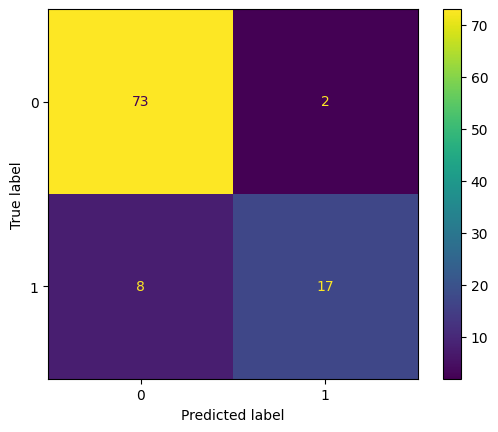

In [ ]:
accuracy_and_cm(logistic_prediction)

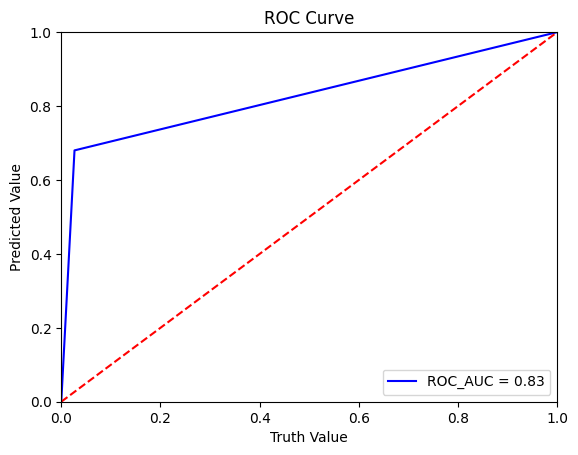

In [ ]:
roc_curve_plot(logistic_prediction)

## *2. Random Forest*

In [ ]:
# Performing gridsearch cv for the best hyper parameters
estimator = RandomForestClassifier(random_state=0)
param_grid = {"n_estimators":[500,1000],"criterion":['gini','entropy'], "max_depth":[1,2],"min_samples_split":[3,4], "min_samples_leaf":[5,6]}
search=GridSearchCV(estimator, param_grid,cv=2,scoring='r2')
result= search.fit(x,y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5550824348493042
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 1000}


In [ ]:
best_model=search.best_estimator_
print(best_model)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=1000, random_state=0)


In [ ]:
rf_pred=best_model.predict(x_test_set)
print(rf_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


Accuracy score for the model is : 89.0%

ROC_AUC score for the model is : 0.8067

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        75
           1       0.89      0.64      0.74        25

    accuracy                           0.89       100
   macro avg       0.89      0.81      0.84       100
weighted avg       0.89      0.89      0.88       100



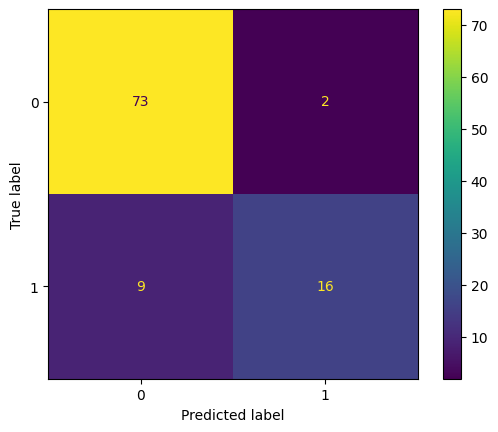

In [ ]:
accuracy_and_cm(rf_pred)

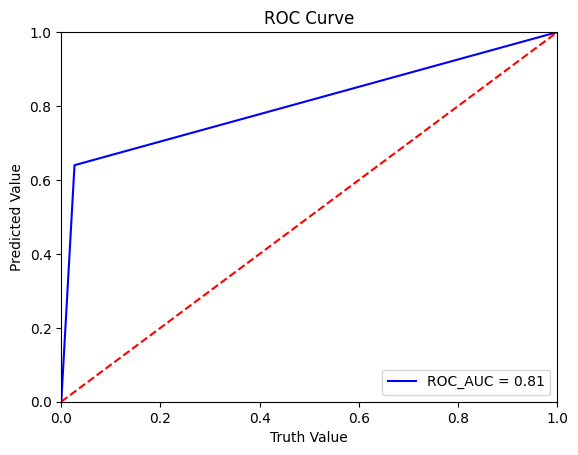

In [ ]:
roc_curve_plot(rf_pred)

# *Model Comparison*

In [ ]:
# Plotting a bar graph to display the accuracy for both the models
trace1 = go.Bar(
         x = np.array("Logistic Regression"),
         y = np.array(accuracy_score(y_test_set, logistic_prediction)),
         name = "Logistic Regression",
         marker = dict(color ='green',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
trace2 = go.Bar(
         x = np.array("Random Forest"),
         y = np.array(accuracy_score(y_test_set, rf_pred)),
         name = "Random Forest",
         marker = dict(color ='violet',
         line=dict(color='rgb(0,0,0)',width=1))
                    )

data = [trace1,trace2]
layout = go.Layout(barmode = "group",title="Machine Learning Classification Models Comparison")
fig = go.Figure(data = data, layout = layout)
iplot(fig)